In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("data/sample_data.csv")

In [3]:
df

,Machine_ID,Temperature,Run_Time,Downtime_Flag
0,1,71,153,Yes
1,2,84,141,Yes
2,3,93,93,Yes
3,4,79,127,No
4,5,75,94,No
...,...,...,...,...
105,106,300,-20,Yes
106,107,-50,500,Yes
107,108,400,600,Yes
108,109,0,700,Yes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Machine_ID,110.0,55.500000,31.898276,1.0,28.25,55.5,82.75,110.0
Temperature,110.0,86.436364,47.543997,-50.0,72.00,82.0,90.00,400.0
Run_Time,110.0,140.163636,111.175993,-20.0,102.00,120.5,141.75,800.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Machine_ID     110 non-null    int64 
 1   Temperature    110 non-null    int64 
 2   Run_Time       110 non-null    int64 
 3   Downtime_Flag  110 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.6+ KB


In [6]:
df.isnull().sum()

Machine_ID       0
Temperature      0
Run_Time         0
Downtime_Flag    0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
downtime_values=df['Downtime_Flag'].value_counts()
downtime_values

Downtime_Flag
Yes    69
No     41
Name: count, dtype: int64

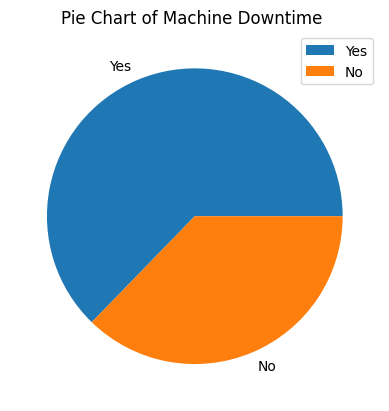

In [12]:
plt.pie(downtime_values,labels=['Yes','No'])
plt.title("Pie Chart of Machine Downtime ")
plt.legend()
plt.show()

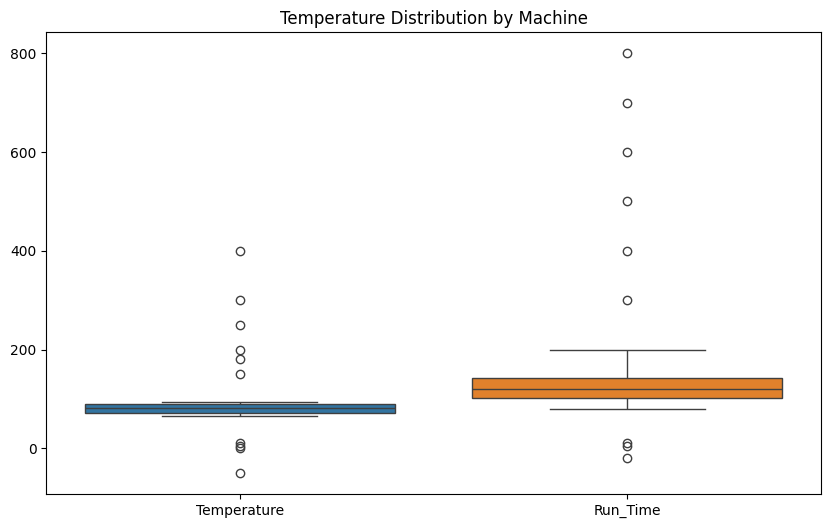

In [13]:

plt.figure(figsize=(10, 6))
sns.boxplot(df[['Temperature','Run_Time']])
plt.title('Temperature Distribution by Machine')
plt.show()

<Axes: ylabel='Density'>

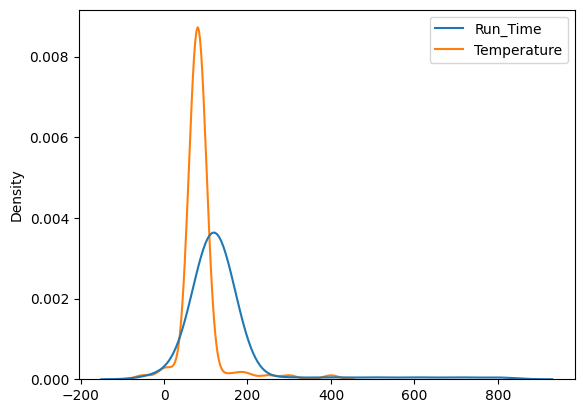

In [14]:
sns.kdeplot(df[['Run_Time','Temperature']])

In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a mask to filter out the outliers
mask = (df['Temperature'] >= (Q1 - 1.5 * IQR)) & (df['Temperature'] <= (Q3 + 1.5 * IQR))

# Apply the mask to the dataframe
df_filtered = df[mask]

df_filtered.to_csv("data/sample_data.csv",index=False)